In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
df_train=pd.read_excel('Data_Train.xlsx')
df_test=pd.read_excel('Test_set.xlsx')

In [3]:
df_train.shape,df_test.shape

((10683, 11), (2671, 10))

In [4]:
df_train.tail(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
df_test.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


In [6]:
df=pd.concat([df_train,df_test])

In [7]:
df.reset_index(drop=True)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [8]:
df.shape

(13354, 11)

In [9]:
df.info()   #information about the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


### finding the null values

  null value are less compare to use data  
  we can delet the null data  

In [10]:
#finding the null values
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [11]:
df.dropna(subset=["Route","Total_Stops"],inplace=True)

In [12]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
dtype: int64

###  exracting day ,month ,time  from Dataset using datetime

In [13]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3



Extracting Hours

Extracting Minutes

In [14]:

df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,16,50


### Now we can drop Date_of_Journey,Dep_Time as it is of no use

In [16]:
df.drop(["Date_of_Journey"], axis = 1, inplace = True)
df.drop(["Dep_Time"], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218.0,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302.0,1,3,16,50


In [17]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218.0,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302.0,1,3,16,50,21,35


In [18]:
# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [19]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [20]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [21]:
df.drop(["Duration"], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,1,3,16,50,21,35,4,45


### finding the catagorical value

In [22]:
column=[column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

## Handling categorical data
We are using two main Encoding Techniques to covert Categorical data into some numerical format
Nominal data -- Data that are not in any order -->one hot encoding
ordinal data -- Data are in order --> labelEncoder

### finding count of all catagorical data

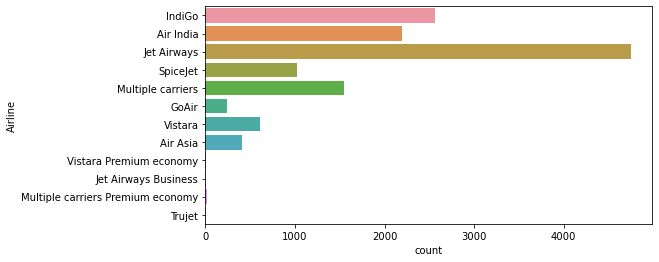

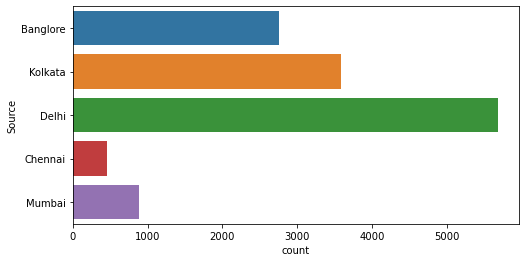

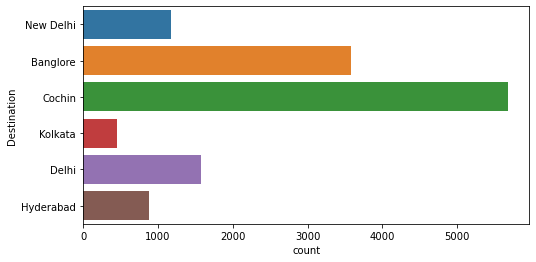

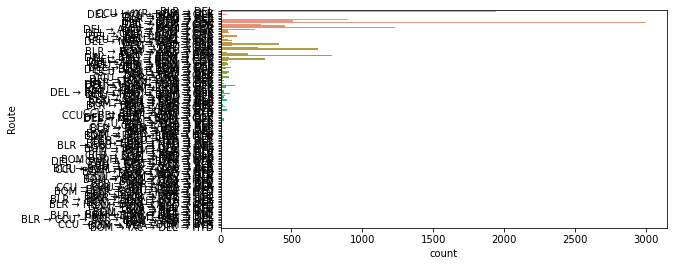

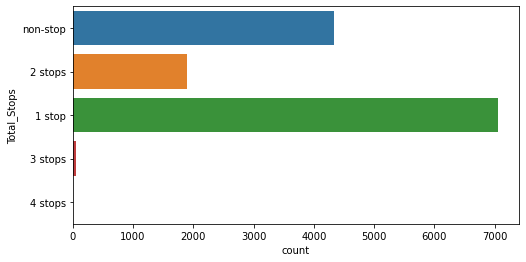

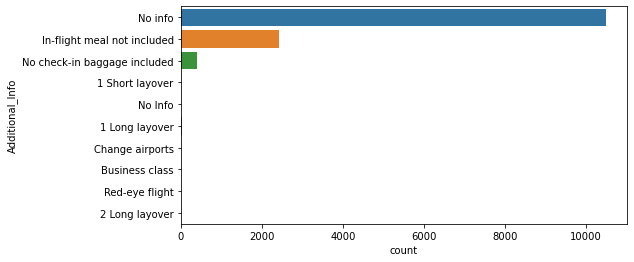

In [23]:
for i in range(len(column)):
    plt.figure(figsize=(8,4))
    sns.countplot(y=column[i],data=df)

# Catagerioal data and relation to price

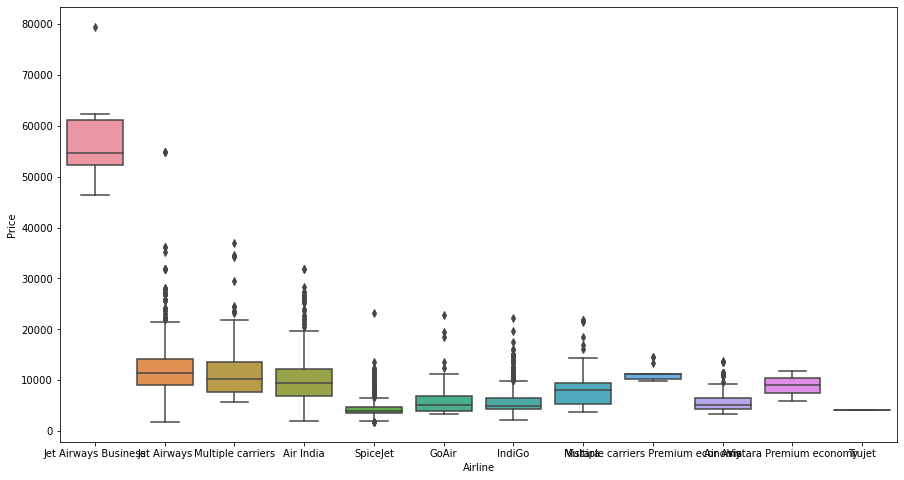

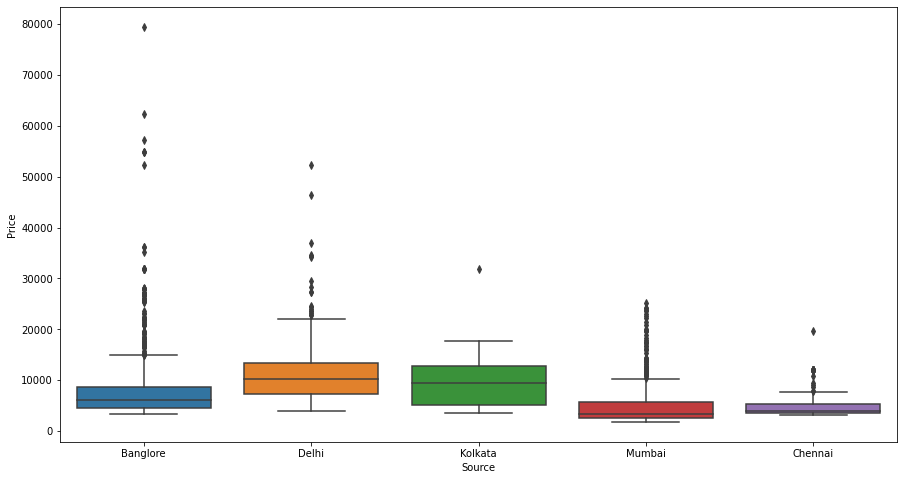

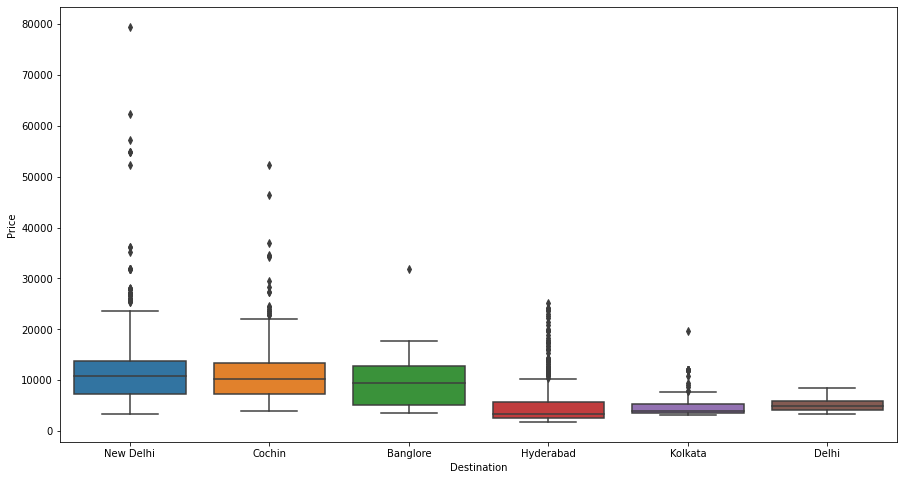

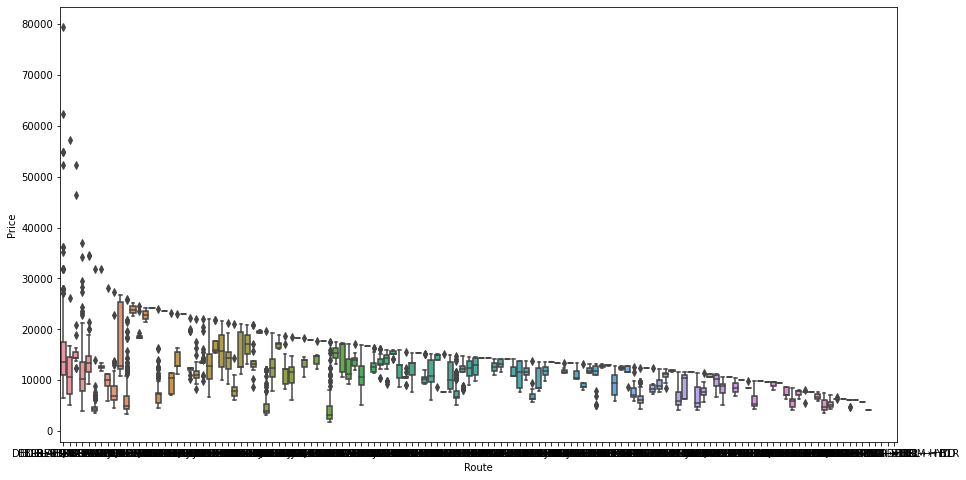

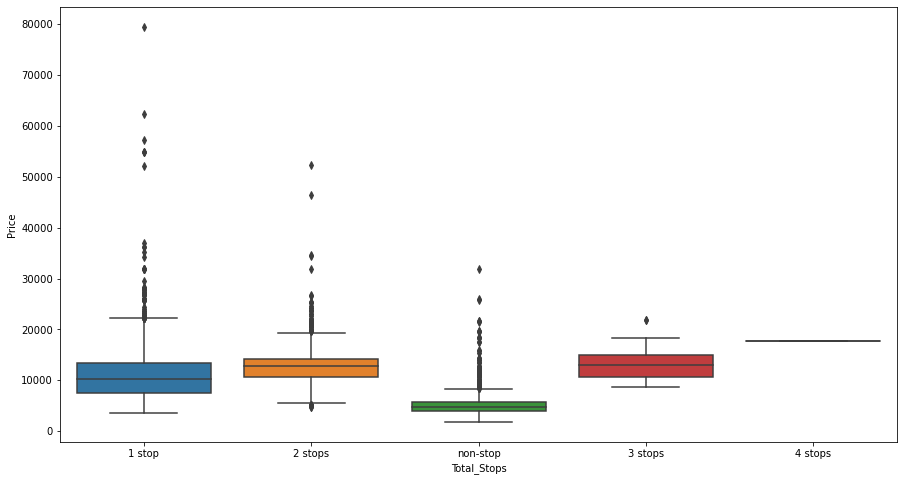

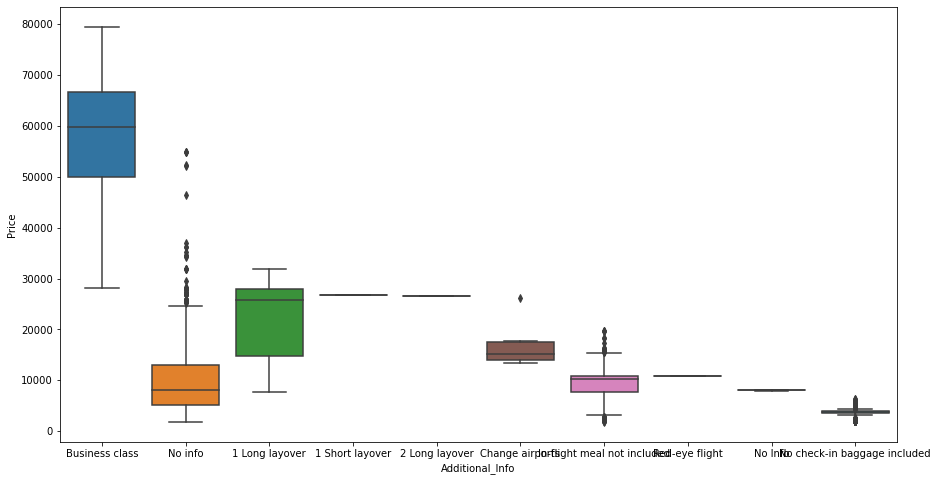

In [24]:
for i in range(len(column)):
    plt.figure(figsize=(15,8))
    sns.boxplot(x=column[i],y='Price',data=df.sort_values('Price',ascending=False))

In [25]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(df['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [26]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  


In [27]:
# Encode labels in column 'species'.
df['Source']= label_encoder.fit_transform(df['Source'])
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,0,New Delhi,BLR → DEL,non-stop,No info,3897.0,24,3,22,20,1,10,2,50
1,Air India,3,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1,5,5,50,13,15,7,25
2,Jet Airways,2,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,9,6,9,25,4,25,19,0
3,IndiGo,3,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,12,5,18,5,23,30,5,25
4,IndiGo,0,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,1,3,16,50,21,35,4,45


In [28]:
destination=pd.get_dummies(df['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1



Additional_Info contains almost 80% no_info

Route and Total_Stops are related to each other.Therefor  the route and Additional_Info can be drop.

In [29]:


df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [30]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,0,New Delhi,non-stop,3897.0,24,3,22,20,1,10,2,50
1,Air India,3,Banglore,2 stops,7662.0,1,5,5,50,13,15,7,25
2,Jet Airways,2,Cochin,2 stops,13882.0,9,6,9,25,4,25,19,0
3,IndiGo,3,Banglore,1 stop,6218.0,12,5,18,5,23,30,5,25
4,IndiGo,0,New Delhi,1 stop,13302.0,1,3,16,50,21,35,4,45


In [31]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,0,New Delhi,0,3897.0,24,3,22,20,1,10,2,50
1,Air India,3,Banglore,2,7662.0,1,5,5,50,13,15,7,25
2,Jet Airways,2,Cochin,2,13882.0,9,6,9,25,4,25,19,0
3,IndiGo,3,Banglore,1,6218.0,12,5,18,5,23,30,5,25
4,IndiGo,0,New Delhi,1,13302.0,1,3,16,50,21,35,4,45


In [32]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

df= pd.concat([df, Airline, destination], axis = 1)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,0,New Delhi,0,3897.0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,3,Banglore,2,7662.0,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,2,Cochin,2,13882.0,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,IndiGo,3,Banglore,1,6218.0,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,IndiGo,0,New Delhi,1,13302.0,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [33]:
### There are no need for Airline + Source + Destination column
df.drop(["Airline",  "Destination"], axis = 1, inplace = True)
df.head()

,Source,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,3897.0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3,2,7662.0,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,13882.0,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,3,1,6218.0,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,13302.0,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


### Checking for outliers.

In [34]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

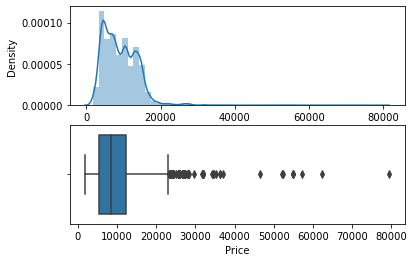

In [35]:
plot(df,'Price')

As there is some outliers in price feature,so we replace it with median.

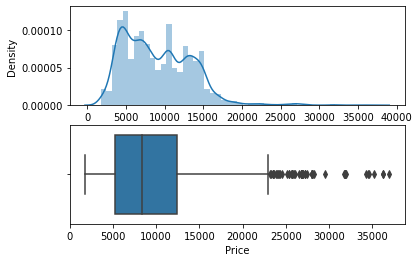

In [36]:
df['Price']=np.where(df['Price']>=40000,df['Price'].median(),df['Price'])
plot(df,'Price')

#### spliting the Dataframe back to train and test dataset

In [37]:
df.iloc[:df_train.shape[0]-1]  ### row wise split

,Source,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,3897.0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3,2,7662.0,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,13882.0,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,3,1,6218.0,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,13302.0,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,3,0,4107.0,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10679,3,0,4145.0,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10680,0,0,7229.0,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,0,12648.0,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [38]:
df.isnull().sum()

Source                                  0
Total_Stops                             0
Price                                2671
Journey_day                             0
Journey_month                           0
Dep_hour                                0
Dep_min                                 0
Arrival_hour                            0
Arrival_min                             0
Duration_hours                          0
Duration_mins                           0
Air India                               0
GoAir                                   0
IndiGo                                  0
Jet Airways                             0
Jet Airways Business                    0
Multiple carriers                       0
Multiple carriers Premium economy       0
SpiceJet                                0
Trujet                                  0
Vistara                                 0
Vistara Premium economy                 0
Cochin                                  0
Delhi                             

In [39]:
df_train2=df.iloc[:df_train.shape[0]-1]
df_train2.head()

,Source,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,3897.0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3,2,7662.0,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,13882.0,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,3,1,6218.0,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,13302.0,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
df.iloc[df_train.shape[0]:].drop('Price',axis=1) ### split the test dataset and droping price column

,Source,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
1,3,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,2,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,2,1,12,6,18,15,12,35,18,20,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,3,1,6,6,20,30,20,25,23,55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2667,3,0,27,3,14,20,16,55,2,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2668,2,1,6,3,21,50,4,25,6,35,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2669,2,1,6,3,4,0,19,15,15,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [41]:
df_test2=df.iloc[df_train.shape[0]:].drop('Price',axis=1)
df_test2.head()

,Source,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
1,3,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,2,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,2,1,12,6,18,15,12,35,18,20,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


### Spliting the dataset into independent and dependent feature

In [42]:
#independent or predictive feature
x=df_train2.drop('Price',axis=1)
x.head()

,Source,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
# dependent or target feature
y=df_train2["Price"]
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [44]:
x.shape,y.shape

((10682, 26), (10682,))

####  spliting the data set into train and test 

In [45]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=123)

In [46]:
X_train

,Source,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
3725,4,0,27,5,22,45,0,15,1,30,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1251,3,1,12,5,6,30,8,15,25,45,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
265,2,1,21,3,11,40,1,35,13,55,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1472,4,0,21,5,13,15,14,45,1,30,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
495,3,1,6,5,14,5,9,20,19,15,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9786,2,1,27,5,10,20,1,30,15,10,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
7763,3,1,3,4,15,5,20,20,5,15,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5218,2,1,9,3,21,5,1,45,4,40,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1346,2,2,9,6,5,55,19,15,37,20,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [47]:
y_train

3725     1965.0
1251     8586.0
265      7695.0
1472     1965.0
495      9663.0
         ...   
9786     6795.0
7763     4649.0
5218     6937.0
1346    10493.0
3582     2017.0
Name: Price, Length: 8545, dtype: float64

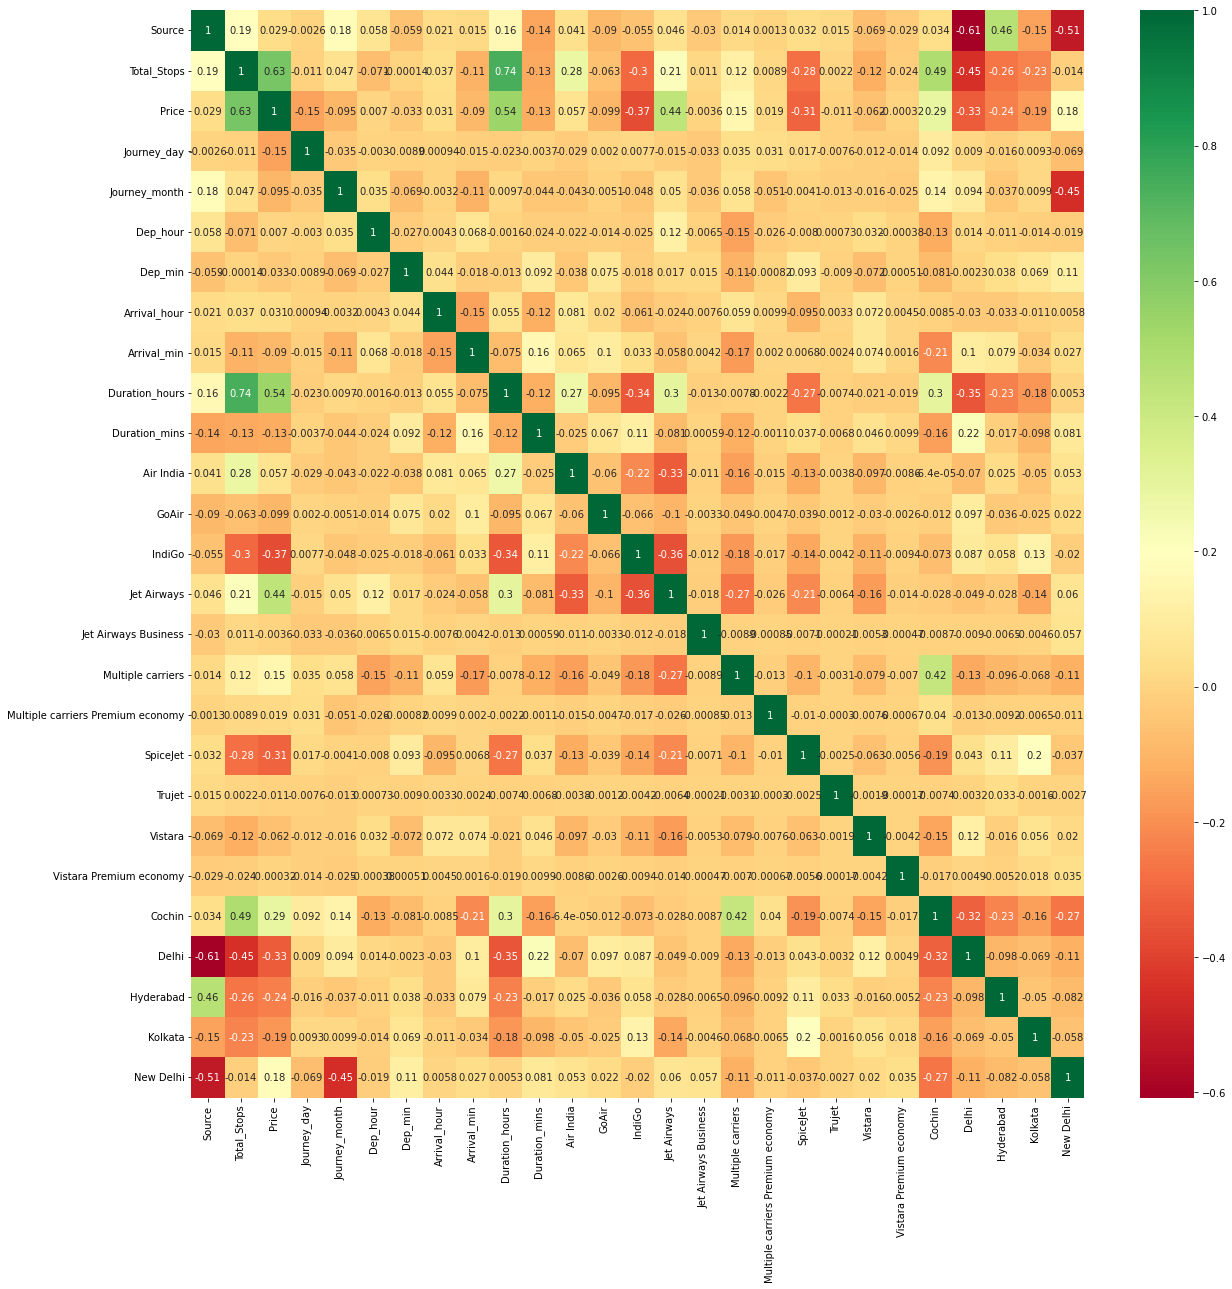

In [48]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df_train2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [49]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [50]:

def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
    #Adj_r2 = 1 - (1-r2score(y_test, predictions)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    #print("Adj_r2 is: {}".format(Adj_r2))  
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)  

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

In [52]:
from xgboost import XGBRFRegressor
from sklearn.svm import SVR


#### Logisticregression,KNN,DT,RF,Xgboost  Model

Model is: LogisticRegression()
Training score: 0.2459918080748976
Predictions are: [14571. 15237. 10844. ...  4226.  7202. 10262.]


r2 score is: 0.24102988176169982
MAE:2341.837622835751
MSE:13599191.232101075
RMSE:3687.70812729276


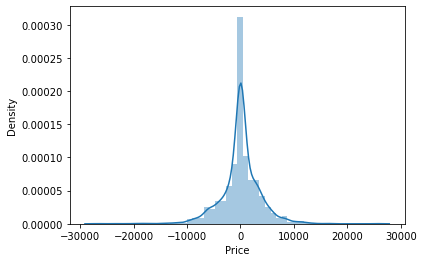

In [53]:
predict(LogisticRegression())

Model is: KNeighborsRegressor()
Training score: 0.7508440996673876
Predictions are: [ 7846.  14809.2 12933.2 ...  3197.4  8182.6 11232.4]


r2 score is: 0.6290745773317379
MAE:1741.6094525035096
MSE:6646224.448759944
RMSE:2578.0272397241934


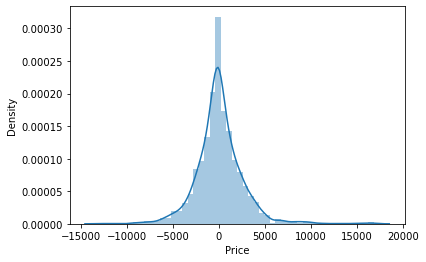

In [54]:
predict(KNeighborsRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.966705153347859
Predictions are: [ 8996. 18550. 14571. ...  3943.  6069. 10262.]


r2 score is: 0.7271088463911277
MAE:1276.4328263921386
MSE:4889650.981371731
RMSE:2211.2555215016946


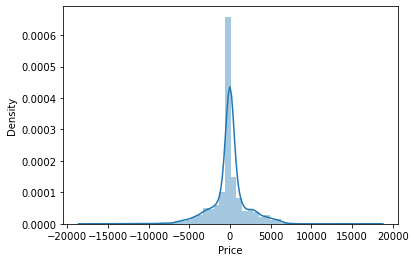

In [55]:
predict(DecisionTreeRegressor())

Model is: GradientBoostingRegressor()
Training score: 0.775914884804699
Predictions are: [ 5493.90777523 16392.57189586 11732.227079   ...  5227.95670291
  6303.99002464 11949.24874432]


r2 score is: 0.7794161029663065
MAE:1471.804755670139
MSE:3952411.9940930675
RMSE:1988.067401798306


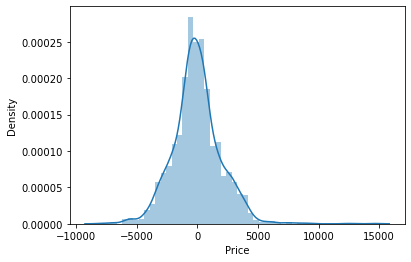

In [56]:
predict(GradientBoostingRegressor())

Model is: RandomForestRegressor()
Training score: 0.9519732951444234
Predictions are: [ 8315.925      17212.305      13730.23166667 ...  3814.22
  5744.06       10440.163     ]


r2 score is: 0.8305752989594196
MAE:1099.5038243879037
MSE:3035743.902856777
RMSE:1742.3386303634484


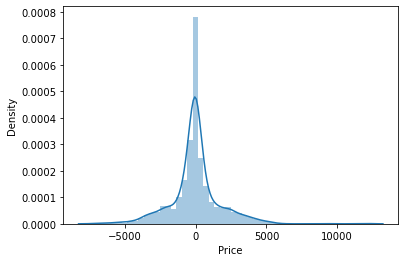

In [57]:
predict(RandomForestRegressor())

Model is: SVR()
Training score: 0.005548934504472913
Predictions are: [8401.72462148 8184.04944049 8329.30024973 ... 8144.34273691 8447.12632843
 8477.59190925]


r2 score is: 0.016940489763385358
MAE:3402.300290937991
MSE:17614414.52171353
RMSE:4196.953004468066


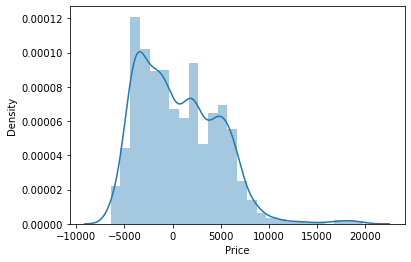

In [58]:
predict(SVR())

Model is: XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
Training score: 0.9258310293214445
Predictions are: [ 8318.929  17499.076  12972.624  ...  3724.7485  5501.58   11336.238 ]


r2 score is: 0.8570641860542065
MAE:1089.695267430521
MSE:2561117.2575236363
RMSE:1600.3491048904411


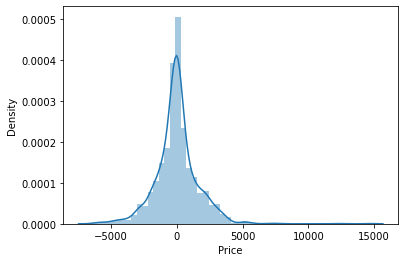

In [59]:
from xgboost import XGBRegressor
predict(XGBRegressor())

In [60]:
model2=XGBRegressor()


In [61]:
XGBRFRegressor().fit(X_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

Here Xgboost ML model perform best among other model

### Save pickle model

In [62]:
# save the model
import pickle
pickle.dump(model2, open("rgb_model.pkl", "wb"))
